![image.png](attachment:image.png)

Agrupamento de Compras Online
---

<br>

LinkedIn: [Willian Campos](https://www.linkedin.com/in/willian-campos-498550b2/)

# **Tópicos**
---

<ol type="1">
  <li>Entendimento do Problema</li>
  <li>Entendimento e Preparação dos Dados</li>
  <li>Modelagem</li>
  <li>Conclusões</li>
</ol>







In [3]:
!pip install gower

In [4]:
# Carregando bibliotecas que vão ser utilizadas no projeto

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from gower import gower_matrix
import gower

from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import pairwise_distances
from sklearn.metrics import silhouette_score
from sklearn.metrics import davies_bouldin_score
from sklearn import metrics
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances, pairwise_distances

from scipy.cluster.hierarchy import dendrogram, linkage
from scipy.spatial.distance import squareform
from scipy.cluster.hierarchy import fcluster
from scipy.spatial.distance import hamming
import scipy

# Etapa 1 Crisp - DM: Entendimento do Problema

Este projeto tem o intuito de fazer agrupamento de consumidores que fazem compra online conforme as informações que estão disponíveis na tabela abaixo (Entendimento dos dados). O agrupamento será feito com uso de aprendizado de máquina e técnicas estatísticas, além do entendimento do real impacto dessa separação e o que pode ser aplicado ao entender que consumidores podem ser separados por terem hábitos e características diferentes.
<br><br>

Para entender melhor a distribuição dos grupos, será utilizado mais de uma técnica de agrupamento para poderem ser comparadas. Será necessário fazer varias transformações dos dados que possuam grandeza numérica diferente ou tipo diferente, como dados categóricos e numéricos, por fim podera ser verificado os grupos e entender o que cada conjunto de cliente representa e que diferença isso impacta.

# Etapa 2 Crisp-DM: Entendimento e Preparação dos Dados

### Dicionário de dados
<br><br>
|Variavel                |Descrição          |
|------------------------|:-------------------|
|Administrative          | Quantidade de acessos em páginas administrativas|
|Administrative_Duration | Tempo de acesso em páginas administrativas |
|Informational           | Quantidade de acessos em páginas informativas  |
|Informational_Duration  | Tempo de acesso em páginas informativas  |
|ProductRelated          | Quantidade de acessos em páginas de produtos |
|ProductRelated_Duration | Tempo de acesso em páginas de produtos |
|BounceRates             | *Percentual de visitantes que entram no site e saem sem acionar outros *requests* durante a sessão  |
|ExitRates               | * Soma de vezes que a página é visualizada por último em uma sessão dividido pelo total de visualizações |
|PageValues              | * Representa o valor médio de uma página da Web que um usuário visitou antes de concluir uma transação de comércio eletrônico |
|SpecialDay              | Indica a proximidade a uma data festiva (dia das mães etc) |
|Month                   | Mês  |
|OperatingSystems        | Sistema operacional do visitante |
|Browser                 | Browser do visitante |
|Region                  | Região |
|TrafficType             | Tipo de tráfego                  |
|VisitorType             | Tipo de visitante: novo ou recorrente |
|Weekend                 | Indica final de semana |
|Revenue                 | Indica se houve compra ou não |



Algumas variáveis vão ter mais importância que outras, pois explicam e separam melhor as características dos clientes e algumas variáveis podem não fazer sentido algum para encontrar um resultado, então as variáveis precisaram ser testadas para entender quais são mais importantes para poder fazer a classificação. Além disso, a característica **Revenue** Que indica se houve compra ou não, será tratada em algumas situações como uma variável resposta, aquela que justifica se as demais características fazem sentido ou não.

In [7]:
# URL do arquivo raw no GitHub
url = 'https://raw.githubusercontent.com/Willian-Campos/DataScienceProjects/master/ebac_ciencia-de-dados_projeto03_clustering/online_shoppers_intention.csv'
# Ler o arquivo .csv diretamente do GitHub
df_inalterado = pd.read_csv(url)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


In [8]:
# Primeira verificação dos dados, sendo 12330 linhas, que são os acessos
df_inalterado

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,Feb,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,Dec,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,Nov,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,Nov,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,Nov,2,2,3,11,Returning_Visitor,False,False


In [9]:
# Verificando se há valores faltantes no DataFrame

df_inalterado.isnull().sum()

,0
Administrative,0
Administrative_Duration,0
Informational,0
Informational_Duration,0
ProductRelated,0
ProductRelated_Duration,0
BounceRates,0
ExitRates,0
PageValues,0
SpecialDay,0


#### A verificação abaixo é utilizada para entender melhor quais das colunas são colunas numéricas e quais são categóricas, as categóricas ainda podem usar números para representar suas categorias, mas elas ainda não são quantitativas, não se pode fazer contas com esses números, eles apenas servem para exemplificar que tem uma distinção representada pelo número.
<br>

#### Nas estapas posteriores essas divisões vão precisar ser realizadas para normalizar as variáveis numéricas e padronizar variáveis categóricas, assim melhorando a maneira que os aprendizados de máquina trabalham com esses valores.

In [10]:
# Verificando quantos valores únicos tem em cada coluna
df_inalterado.nunique()

,0
Administrative,27
Administrative_Duration,3335
Informational,17
Informational_Duration,1258
ProductRelated,311
ProductRelated_Duration,9551
BounceRates,1872
ExitRates,4777
PageValues,2704
SpecialDay,6


In [11]:
# Verificando o tipo de cada valor
df_inalterado.dtypes

,0
Administrative,int64
Administrative_Duration,float64
Informational,int64
Informational_Duration,float64
ProductRelated,int64
ProductRelated_Duration,float64
BounceRates,float64
ExitRates,float64
PageValues,float64
SpecialDay,float64


#### Como já foi percebido que a variável Month(mês) está no formato de texto e é necessário que fique no formato numérico, já será alterado esses valores com uso de dicionário, como visto acima tem apenas 10 meses, mas o dicionário será feita de forma completa para usar em diferentes bases de dados.

In [12]:
# Está faltando janeiro e abril nessa base de dados.
df_inalterado['Month'].unique()

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

In [13]:
# Criando um dicionário para alterar a coluna month para inteiros
meses_para_numeros = {
    'Jan': 1,
    'Feb': 2,
    'Mar': 3,
    'Apr': 4,
    'May': 5,
    'June': 6,
    'Jul': 7,
    'Aug': 8,
    'Sep': 9,
    'Oct': 10,
    'Nov': 11,
    'Dec': 12
}

# Mapeando a coluna month e alterando para inteiros de acordo com a lista
df_dummy = df_inalterado.copy()
df_dummy['Month'] = df_dummy['Month'].map(meses_para_numeros)
df_dummy

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,Returning_Visitor,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,Returning_Visitor,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,Returning_Visitor,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,Returning_Visitor,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,Returning_Visitor,False,False


#### Para trabalhar com aprendizado de máquina é aconselhavel alterar as variáveis para que elas fiquem numéricas, mesmo que não vá ser utilizada para fazer contas, os algoritimos trabalham melhor com números,

In [14]:
print(df_dummy['VisitorType'].unique())
print(df_dummy['Weekend'].unique())
print(df_dummy['Revenue'].unique())

['Returning_Visitor' 'New_Visitor' 'Other']
[False  True]
[False  True]


In [15]:
# Transformando o VisitorType em dummy, ou seja, vai ter valor 1 em seu tipo e 0 quando não for seu tipo
df_dummy = pd.get_dummies(df_dummy, columns=['VisitorType'], drop_first=True)
df_dummy

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue,VisitorType_Other,VisitorType_Returning_Visitor
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,False,False,False,True
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,False,False,False,True
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,False,False,False,True
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,False,False,False,True
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,True,False,False,True
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,True,False,False,True
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,True,False,False,True
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,False,False,False,True


In [16]:
# Transformando em 0 e 1 os valores booleanos
df_dummy = pd.get_dummies(df_dummy, columns=['Weekend', 'Revenue'], drop_first=True)
df_dummy

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,1,1,1,1,False,True,False,False
1,0,0.0,0,0.0,2,64.000000,0.000000,0.100000,0.000000,0.0,2,2,2,1,2,False,True,False,False
2,0,0.0,0,0.0,1,0.000000,0.200000,0.200000,0.000000,0.0,2,4,1,9,3,False,True,False,False
3,0,0.0,0,0.0,2,2.666667,0.050000,0.140000,0.000000,0.0,2,3,2,2,4,False,True,False,False
4,0,0.0,0,0.0,10,627.500000,0.020000,0.050000,0.000000,0.0,2,3,3,1,4,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,145.0,0,0.0,53,1783.791667,0.007143,0.029031,12.241717,0.0,12,4,6,1,1,False,True,True,False
12326,0,0.0,0,0.0,5,465.750000,0.000000,0.021333,0.000000,0.0,11,3,2,1,8,False,True,True,False
12327,0,0.0,0,0.0,6,184.250000,0.083333,0.086667,0.000000,0.0,11,3,2,1,13,False,True,True,False
12328,4,75.0,0,0.0,15,346.000000,0.000000,0.021053,0.000000,0.0,11,2,2,3,11,False,True,False,False


In [17]:
# Verificando a proporção de compras, sendo 15% dos acessos tem o resultado de compra,
# Sendo um total de 12330 acessos, o valor 1 passado quer dizer que a compra foi efetuada e 0 que não
df_dummy['Revenue_True'].value_counts(1)

,proportion
Revenue_True,
False,0.845255
True,0.154745


#### Para algumas comparações que vão ser feitas os valores precisam estar em uma escala semelhante, alguns valores tem escala semelhante como a duração em uma página especifica, mas os demais não tem essa similaridade, portanto em alguns casos será usado um DataFrame especifico que vai estar padronizado para que essas variáveis numéricas continuas tenham desvio padrão 1 e média 0.

In [18]:
numericas = ['Administrative_Duration', 'Informational_Duration', 'ProductRelated_Duration',
             'BounceRates', 'ExitRates', 'PageValues']

In [19]:
df_dummy_normalizado = df_dummy.copy() # Criando novo DF para salvar os valores normalizados

# Criando o objeto scaler para normalizar a média e desvio padrão
scaler = StandardScaler()

# Normalizando as colunas que tem valores numéricos continuos
df_dummy_normalizado[numericas] = scaler.fit_transform(df_dummy_normalizado[numericas])

df_dummy_normalizado

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType_Other,VisitorType_Returning_Visitor,Weekend_True,Revenue_True
0,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,0.0,2,1,1,1,1,False,True,False,False
1,0,-0.457191,0,-0.244931,2,-0.590903,-0.457683,1.171473,-0.317178,0.0,2,2,2,1,2,False,True,False,False
2,0,-0.457191,0,-0.244931,1,-0.624348,3.667189,3.229316,-0.317178,0.0,2,4,1,9,3,False,True,False,False
3,0,-0.457191,0,-0.244931,2,-0.622954,0.573535,1.994610,-0.317178,0.0,2,3,2,2,4,False,True,False,False
4,0,-0.457191,0,-0.244931,10,-0.296430,-0.045196,0.142551,-0.317178,0.0,2,3,3,1,4,False,True,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12325,3,0.363075,0,-0.244931,53,0.307822,-0.310366,-0.288966,0.342125,0.0,12,4,6,1,1,False,True,True,False
12326,0,-0.457191,0,-0.244931,5,-0.380957,-0.457683,-0.447364,-0.317178,0.0,11,3,2,1,8,False,True,True,False
12327,0,-0.457191,0,-0.244931,6,-0.528063,1.261014,0.897093,-0.317178,0.0,11,3,2,1,13,False,True,True,False
12328,4,-0.032916,0,-0.244931,15,-0.443536,-0.457683,-0.453140,-0.317178,0.0,11,2,2,3,11,False,True,False,False


### Correlação

#### O código abaixo calcula a correlação entre os dados numéricos continuos onde 1 é uma correlação crescente, quando um aumenta o outro também aumenta e -1 é uma correlação decrescente, quando uma variável aumenta a outra diminui. O intuito é entender quais variáveis tem correlação entre si para entender melhor a natureza dos dados.
<br>

#### Nesse caso a maior correlação foi entre ExitRates e BounceRates, o que faz sentido porque ambas procuram explicar a fuga de clientes do site. Outros valores também chegaram a ter um valor um pouco mais alto de Bounce e info duration ou até page values e adm duration, mas essa correlação vai ser explorada mais uma vez na selação de features.

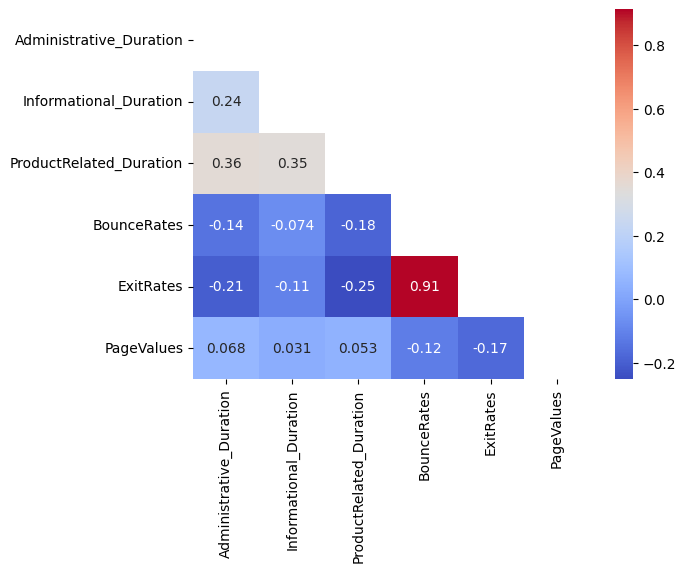

In [20]:
# Calcula a matriz de correlação
matriz_correlacao = df_dummy_normalizado[numericas].corr()

# Cria uma máscara para esconder os valores repetidos e a correlação de uma variável consigo mesma
mascara = np.triu(np.ones_like(matriz_correlacao, dtype=bool))

# Plota a matriz de correlação sem os valores repetidos
sns.heatmap(matriz_correlacao, annot=True, cmap='coolwarm', mask=mascara)
plt.show()

### Distribuição

#### Abaixo foi feito alguns gráficos para comparar a distribuição dos valores que tem a compra efetuada em comparação com as que não foi feito compra, afim de entender algum comportamento entre um caso e outro.
<br>

#### O uso de dados normalizados tira o valor real inicial, porém fica mais fácil de comparar ambos os gráficos, sendo que o foco seria mais na proporção e não no valor real, pelo menos por enquanto.

In [21]:
# Para comparar, foi dividido os valores de compra em 2 DataFrames
df_revenue_1 = df_dummy_normalizado[df_inalterado['Revenue'] == True].copy()
df_revenue_0 = df_dummy_normalizado[df_inalterado['Revenue'] == False].copy()

### Administrative_Duration
#### Os valores de Administrative_Duration tem uma leve alteração, as pessoas que compram usam um pouco mais páginas administrativas em geral.

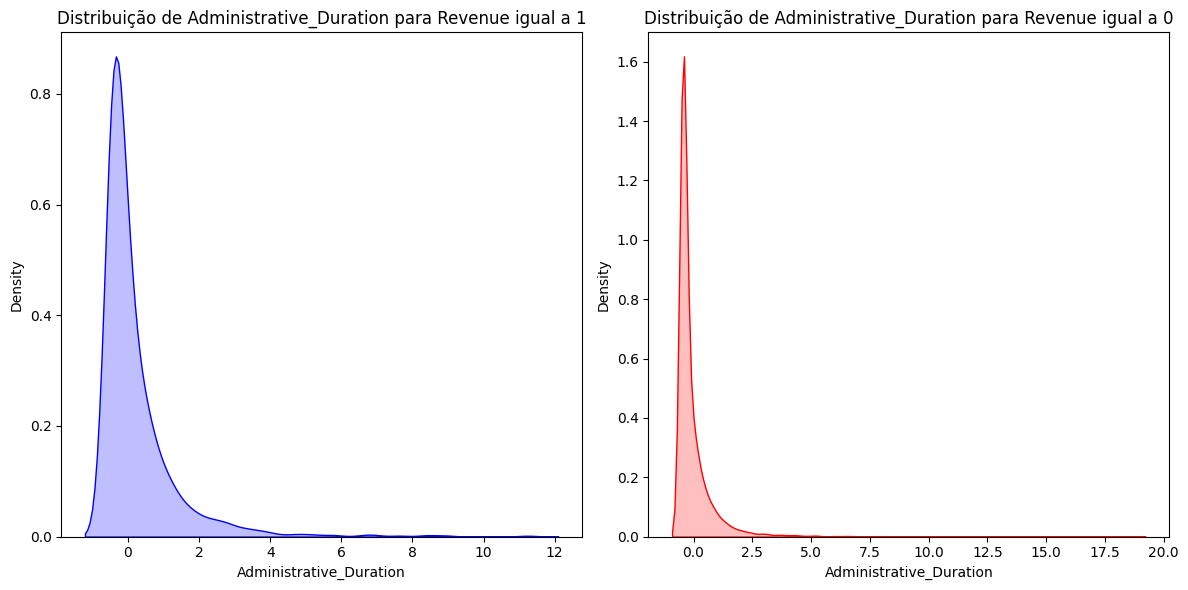

In [22]:
# Ajustando altura e largura, escolhendo a variável a ser representada
plt.figure(figsize=(12, 6))
variavel_interesse = 'Administrative_Duration'

# Plota o KDE plot para Revenue igual a True (1), usando valor proporcional (%)
plt.subplot(1, 2, 1)
sns.kdeplot(df_revenue_1[variavel_interesse], color='blue', fill='True')
plt.title(f'Distribuição de {variavel_interesse} para Revenue igual a 1')

# Plota o KDE plot para Revenue igual a False (0), usando valor proporcional (%)
plt.subplot(1, 2, 2)
sns.kdeplot(df_revenue_0[variavel_interesse], color='red', fill='True')
plt.title(f'Distribuição de {variavel_interesse} para Revenue igual a 0')

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()

### Informational_Duration
#### Ambos os lados são bem semelhantes, porém de forma bem singela o gráfico de Revenue 1 tem maior quantidade de valores, principalmente após 500 de duração.

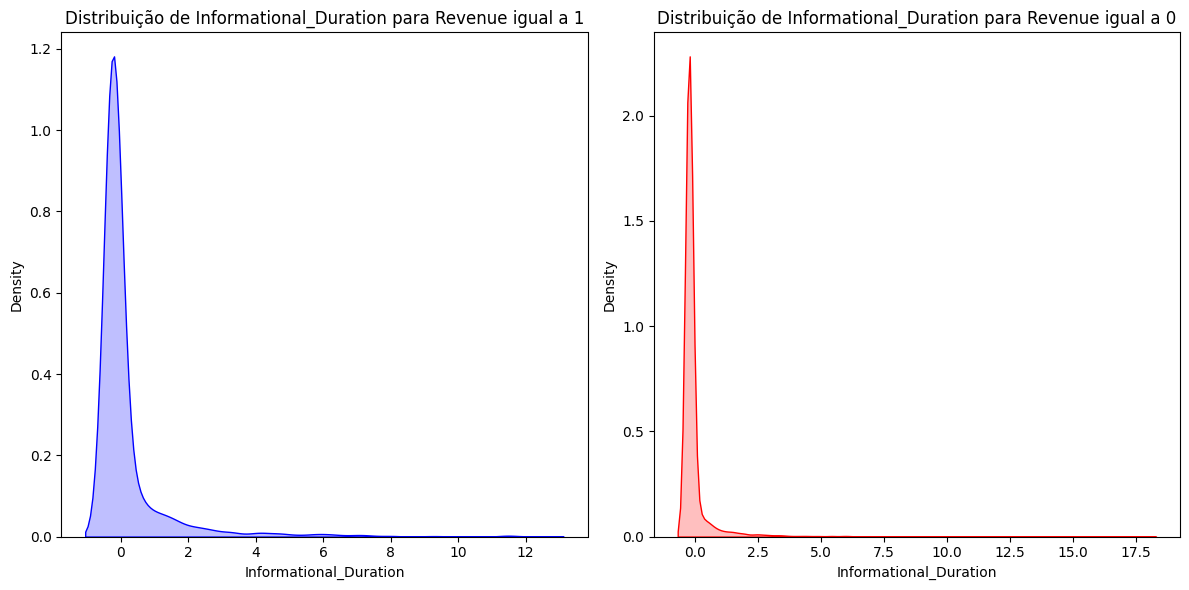

In [23]:
# Ajustando altura e largura, escolhendo a variável a ser representada
plt.figure(figsize=(12, 6))
variavel_interesse = 'Informational_Duration'

# Plota o KDE plot para Revenue igual a True (1), usando valor proporcional (%)
plt.subplot(1, 2, 1)
sns.kdeplot(df_revenue_1[variavel_interesse], color='blue', fill='True')
plt.title(f'Distribuição de {variavel_interesse} para Revenue igual a 1')

# Plota o KDE plot para Revenue igual a False (0), usando valor proporcional (%)
plt.subplot(1, 2, 2)
sns.kdeplot(df_revenue_0[variavel_interesse], color='red', fill='True')
plt.title(f'Distribuição de {variavel_interesse} para Revenue igual a 0')

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()

### ProductRelated_Duration
#### Novamente mesmo comportamento, como o DataFrame dos valores 0 tem 85% da quantidade total, os valores muito distantes da média (outliers) vão estar em sua maioria nesse DataFrame, mas no geral o comportamento se mantem com maior gasto de tempo por pessoas que compram.

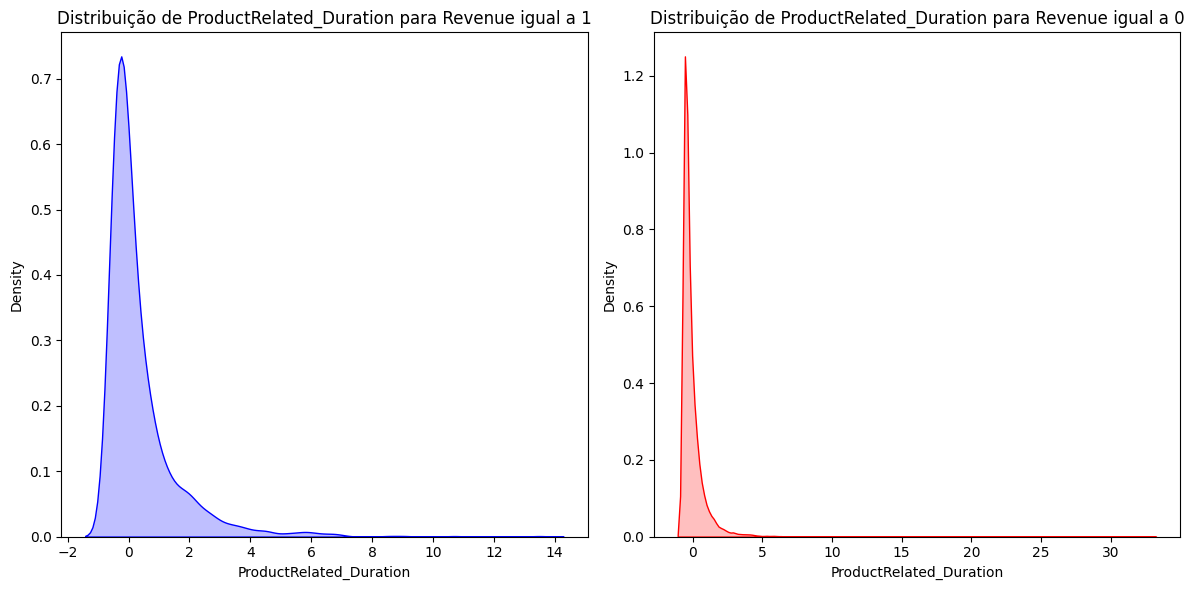

In [24]:
# Ajustando altura e largura, escolhendo a variável a ser representada
plt.figure(figsize=(12, 6))
variavel_interesse = 'ProductRelated_Duration'

# Plota o KDE plot para Revenue igual a True (1), usando valor proporcional (%)
plt.subplot(1, 2, 1)
sns.kdeplot(df_revenue_1[variavel_interesse], color='blue', fill='True')
plt.title(f'Distribuição de {variavel_interesse} para Revenue igual a 1')

# Plota o KDE plot para Revenue igual a False (0), usando valor proporcional (%)
plt.subplot(1, 2, 2)
sns.kdeplot(df_revenue_0[variavel_interesse], color='red', fill='True')
plt.title(f'Distribuição de {variavel_interesse} para Revenue igual a 0')

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()

### BounceRates e ExitRates
#### Como esperado, o BounceRates são maiores para os não compradores, chegando até 20% de saída do site sem outra interação e o ExiteRates tem uma diferença ainda maior, porém precisa verificar se é uma pagina normal de saída, como uma conclusão de compra por exemplo.

In [25]:
# Os valores foram divididos em novos DataFrames porque o BounceRate está em porcentagem e fica
# mais fácil de ver no gráfico dessa forma.
df_inalterado_1 = df_inalterado[df_inalterado['Revenue'] == True].copy()
df_inalterado_0 = df_inalterado[df_inalterado['Revenue'] == False].copy()

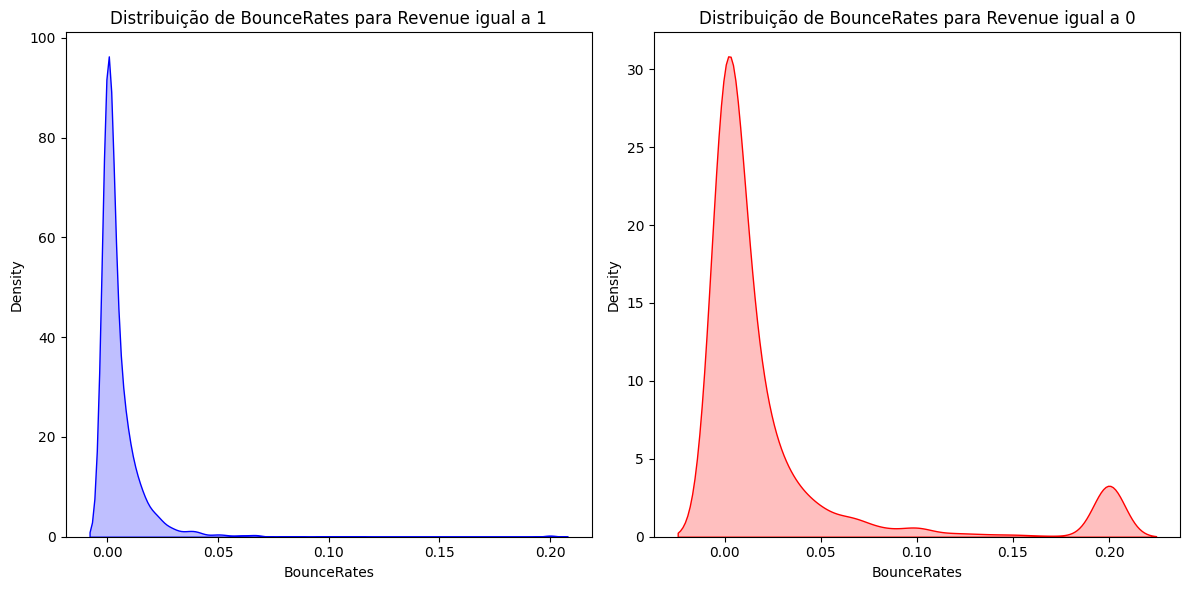

In [26]:
# Ajustando altura e largura, escolhendo a variável a ser representada
plt.figure(figsize=(12, 6))
variavel_interesse = 'BounceRates'

# Plota o KDE plot para Revenue igual a True (1), usando valor proporcional (%)
plt.subplot(1, 2, 1)
sns.kdeplot(df_inalterado_1[variavel_interesse], color='blue', fill='True')
plt.title(f'Distribuição de {variavel_interesse} para Revenue igual a 1')

# Plota o KDE plot para Revenue igual a False (0), usando valor proporcional (%)
plt.subplot(1, 2, 2)
sns.kdeplot(df_inalterado_0[variavel_interesse], color='red', fill='True')
plt.title(f'Distribuição de {variavel_interesse} para Revenue igual a 0')

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()

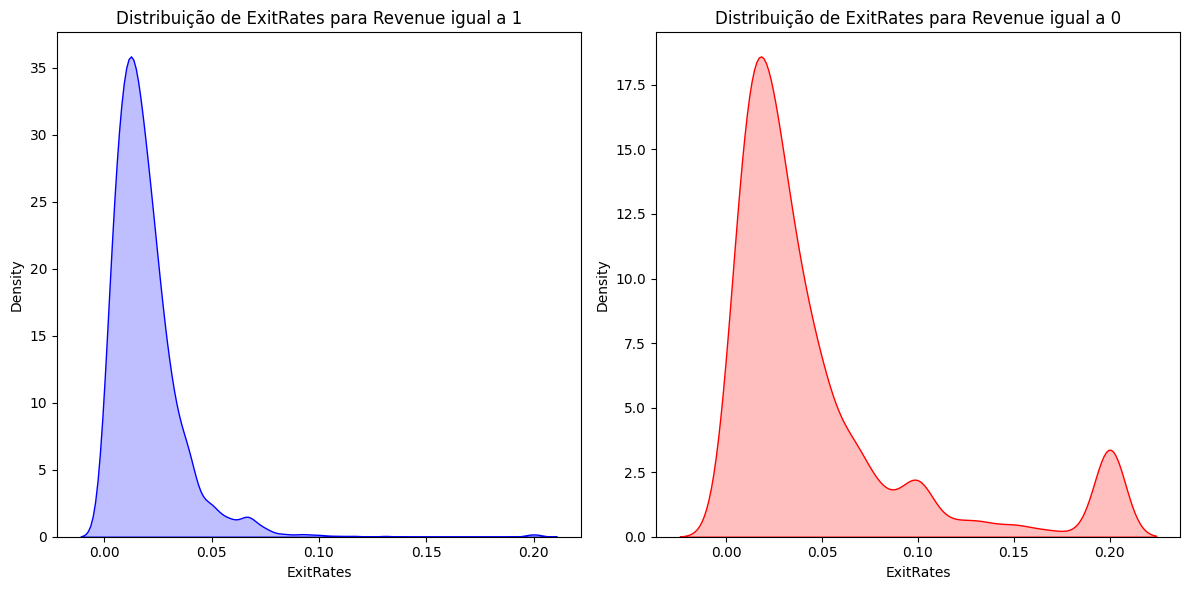

In [27]:
# Ajustando altura e largura, escolhendo a variável a ser representada
plt.figure(figsize=(12, 6))
variavel_interesse = 'ExitRates'

# Plota o KDE plot para Revenue igual a True (1), usando valor proporcional (%)
plt.subplot(1, 2, 1)
sns.kdeplot(df_inalterado_1[variavel_interesse], color='blue', fill='True')
plt.title(f'Distribuição de {variavel_interesse} para Revenue igual a 1')

# Plota o KDE plot para Revenue igual a False (0), usando valor proporcional (%)
plt.subplot(1, 2, 2)
sns.kdeplot(df_inalterado_0[variavel_interesse], color='red', fill='True')
plt.title(f'Distribuição de {variavel_interesse} para Revenue igual a 0')

# Ajusta o layout
plt.tight_layout()

# Mostra o gráfico
plt.show()

#### Nas colunas fornecidas não tem o nome da página em questão, mas é possível saber que mesmo páginas com valores de BounceRates e ExitRates ainda assim podem ter o seu valor, na tabela abaixo foi ordenado os maiores BounceRates, junto aos valores de ExitRates e o valor da página e é identificar na coluna do PageValues páginas que tem valores atrelados.

In [28]:
df_inalterado_1.sort_values(by='BounceRates', ascending=False, inplace=True)
df_inalterado_1

colunas_interessantes = ['PageValues', 'BounceRates', 'ExitRates']
paginas_alto_bounce = df_inalterado_1.head(20)[colunas_interessantes]
paginas_alto_bounce

,PageValues,BounceRates,ExitRates
6700,0.000000,0.200000,0.200000
7600,0.000000,0.200000,0.200000
10789,0.000000,0.200000,0.200000
8106,0.000000,0.110714,0.130952
10531,0.000000,0.100000,0.108333
6433,0.000000,0.083333,0.116667
4407,6.624947,0.068421,0.077193
10615,0.000000,0.066667,0.083333
11522,0.000000,0.066667,0.100000
5593,0.000000,0.066667,0.066667


# FeatureSelection

#### É importânte saber quais as colunas que mais contribuem para a explicação da variável resposta, no caso se está sendo efetuado compra ou não no site, nessa etapa será visto exatamente isso, será medido e comparado as colunas que mais contribuem, sendo que colunas que contribuem muito pouco as vezes acabam diminuindo a eficiência dos algoritimos de aprendizado e/ou agrupamento.

#### Abaixo foi medido as correlações com a Revenue_True que é a variável resposta e aplicado a função .abs() para pegar o valor absoluto, dessa maneira é possível classificar correlações positivas e negativas fortes.
<br>

#### O PageValues teve uma correlação muito alta, mas isso acontece porque sua medida é diretamente associada com as compras, a partir do Weekend_True o valor de correlação desse muito e provavelmente não é mais aconselhavel o uso das variáveis abaixo desse valor.

In [29]:
# Variável que vai guardar os valores de correlação
matriz_correlacao = df_dummy_normalizado.corr()

# Obtém as correlações com a variável de resposta
correlacoes = matriz_correlacao['Revenue_True'].abs().sort_values(ascending=False)
correlacoes

,Revenue_True
Revenue_True,1.000000
PageValues,0.492569
ExitRates,0.207071
ProductRelated,0.158538
ProductRelated_Duration,0.152373
BounceRates,0.150673
Administrative,0.138917
Month,0.127372
VisitorType_Returning_Visitor,0.103843
Informational,0.095200


#### Aqui será criado uma simples árvore, mesmo não sendo a etapa de modelagem, apenas para poder comparar a importância das features com a matriz de correlação. As importâncias serão salvas em um DataFrame e vai ser ordenado por ordem de importância.

In [30]:
# Separando as variáveis explicativas em X e resposta em y
X = df_dummy_normalizado.drop('Revenue_True', axis=1)
y = df_dummy_normalizado['Revenue_True']

# Treinando um modelo de RandomForest
modelo_rf = RandomForestClassifier(random_state=1)
modelo_rf.fit(X, y)

# Obtendo a importância das características
importancias = modelo_rf.feature_importances_

# Criando um DataFrame com as importâncias e colunas correspondentes
df_importancias = pd.DataFrame({'Feature': X.columns, 'Importance': importancias})

# Ordenando por importância do maior para o menor
df_importancias = df_importancias.sort_values(by='Importance', ascending=False)

#### Aqui vale lembrar que o PageValues foi criado para ter uma associação direta com os valores de venda, então já era esperado que tivesse um alto valor e esse valor não deve ser levado em consideração para uma comparação direta com as demais features.

In [31]:
df_importancias

,Feature,Importance
8,PageValues,0.377905
7,ExitRates,0.088691
5,ProductRelated_Duration,0.087928
4,ProductRelated,0.073976
6,BounceRates,0.059738
1,Administrative_Duration,0.057952
10,Month,0.043967
0,Administrative,0.041848
14,TrafficType,0.030933
13,Region,0.030626


<ipython-input-32-e8dc406de160>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Importance', y='Feature', data=df_importancias, palette='viridis')


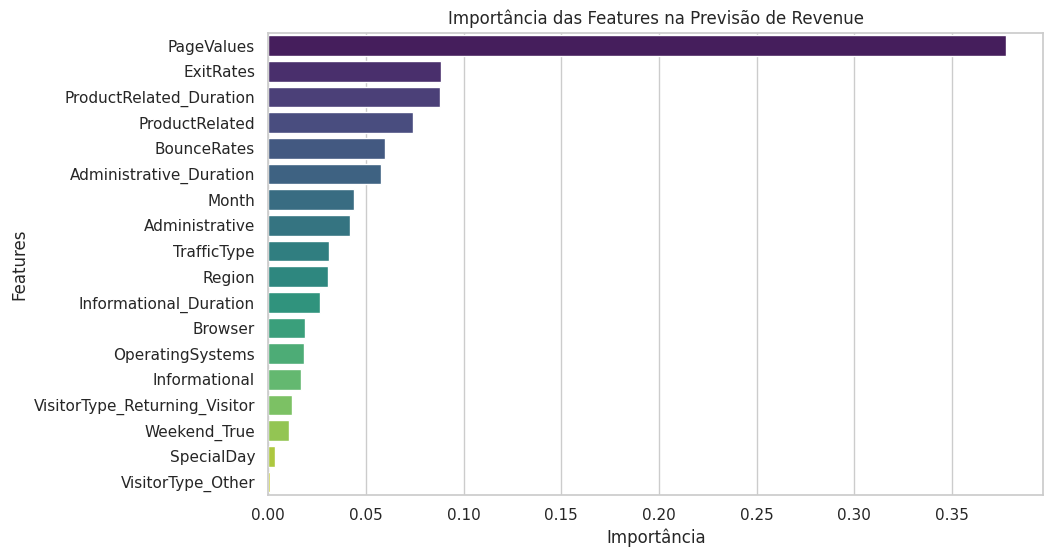

In [32]:
# Tipo do estilo do gráfico
sns.set(style="whitegrid")

# Criando o gráfico de barras horizontal, por conta da quantidade de features
plt.figure(figsize=(10, 6))
sns.barplot(x='Importance', y='Feature', data=df_importancias, palette='viridis')

# Adicionando título e rótulos aos eixos
plt.xlabel('Importância')
plt.ylabel('Features')
plt.title('Importância das Features na Previsão de Revenue')

# Exibindo o gráfico
plt.show()

#### Aqui foi salvo as 11 colunas que melhor explicam o Revenue, esse corte foi baseado na lista obtida pela árvore de decisão e seus resultados.

In [33]:
# Salvando as colunas que melhor explicam o Ravenue
melhores_features = df_importancias['Feature'].head(11).tolist()
df_dummy_normalizado_podado = df_dummy_normalizado[melhores_features].copy()
df_dummy_normalizado_podado

,PageValues,ExitRates,ProductRelated_Duration,ProductRelated,BounceRates,Administrative_Duration,Month,Administrative,TrafficType,Region,Informational_Duration
0,-0.317178,3.229316,-0.624348,1,3.667189,-0.457191,2,0,1,1,-0.244931
1,-0.317178,1.171473,-0.590903,2,-0.457683,-0.457191,2,0,2,1,-0.244931
2,-0.317178,3.229316,-0.624348,1,3.667189,-0.457191,2,0,3,9,-0.244931
3,-0.317178,1.994610,-0.622954,2,0.573535,-0.457191,2,0,4,2,-0.244931
4,-0.317178,0.142551,-0.296430,10,-0.045196,-0.457191,2,0,4,1,-0.244931
...,...,...,...,...,...,...,...,...,...,...,...
12325,0.342125,-0.288966,0.307822,53,-0.310366,0.363075,12,3,1,1,-0.244931
12326,-0.317178,-0.447364,-0.380957,5,-0.457683,-0.457191,11,0,8,1,-0.244931
12327,-0.317178,0.897093,-0.528063,6,1.261014,-0.457191,11,0,13,1,-0.244931
12328,-0.317178,-0.453140,-0.443536,15,-0.457683,-0.032916,11,4,11,3,-0.244931


#### Daqui pra frente será usado apenas essas features, não tem um motivo exato para o corte, usei a lista da árvore de decisão, porém levei em consideração também a matriz de correlação para fazer o corte, como existem features que levam em consideração o tempo que o cliente fica em cada página para dar uma pontuação de importância para essa página, levei bastante em consideração a escolha até o Informational_Duration.
<br>

#### Para minha surpresa as páginas de informação tiveram um resultado muito ruim em ambas analises e o Month teve um resultado melhor do que o esperado, mesmo com o SpecialDay com um resultado tão ruim, esperava-se uma maior relação entre Month e SpecialDay, mas essa etapa serve justamente para isso, para desmestificar algumas informações pré estabelecidas mas que na pratica não funcionam da mesma maneira.

# Modelagem e Agrupamento

#### Antes de separar os grupos de fato, primeiro é necessário ter uma noção da quantidade de grupos que vai ser utilizado para melhor separar/classificar os dados.

### Gower - Medida de Dissimilaridade
<br>

#### O método Gower pode ser utilizado para fazer agrupamento de dados numéricos e categóricos, que é justamente o caso dessa base de dados, ele é flexivel e é facilmente aplicado, mas para isso é necessário deixar explicito quais são cada tipo de coluna.

In [34]:
# Listando todas variáveis que NÃO estão na lista numericas com o uso do "difference"
colunas_nao_numericas = df_dummy_normalizado_podado.columns.difference(numericas)
colunas_nao_numericas

Index(['Administrative', 'Month', 'ProductRelated', 'Region', 'TrafficType'], dtype='object')

In [35]:
# Criando uma lista de TRUE para categóricas e FALSE para numéricas continuas.
vars_cat = [True if x in colunas_nao_numericas else False for x in df_dummy_normalizado_podado.columns]
vars_cat

[False, False, False, True, False, False, True, True, True, True, False]

In [36]:
# Calculando a distância entre os dados e salvando em gower_dist para aplicar nos algoritimos futuros
gower_dist = gower.gower_matrix(df_dummy_normalizado_podado, cat_features=vars_cat)
gower_dist

array([[0.        , 0.31827277, 0.18181819, ..., 0.37753457, 0.629292  ,
        0.42427263],
       [0.31827277, 0.        , 0.40918186, ..., 0.31683755, 0.49283743,
        0.19703044],
       [0.18181819, 0.40918186, 0.        , ..., 0.46844363, 0.629292  ,
        0.5151817 ],
       ...,
       [0.37753457, 0.31683755, 0.46844363, ..., 0.        , 0.43357566,
        0.22901951],
       [0.629292  , 0.49283743, 0.629292  , ..., 0.43357566, 0.        ,
        0.38683757],
       [0.42427263, 0.19703044, 0.5151817 , ..., 0.22901951, 0.38683757,
        0.        ]], dtype=float32)

### K-Means

#### O K-Means é um altoritimo muito popular para agrupar dados e será usado nos agrupamentos a seguir em conjunto com as distâncias calculadas pelo método Gower anteriormente, essas distâncias vão ser aplicadas ao K-Means pois o Gower consegue calcular bem distâncias que misturam dados numéricos e categóricos.

In [37]:
k_clusters = range(2, 8) # Definindo quantidade de clusters a serem testados
inercia_gower = [] # Lista para guardar os valor da soma das distâncias ao centroide

for k in k_clusters:
    clusters = KMeans(n_clusters = k, random_state = 1) # Definindo a quantidade de clusters(2 a 7)
    clusters.fit(gower_dist) # Ajustando o modelo aos dados
    inercia_gower.append(clusters.inertia_) # Adicionando a lista inercia a distância dos valores ao centroide
inercia_gower

[839897.375, 666570.25, 600446.25, 562349.8125, 526361.25, 489070.625]

### Método Cotovelo

#### Com base nas distâncias obtidas, é possível fazer o gráfico abaixo e assim pode ser usado o método do cotovelo, esse método trata de mostrar um gráfico com a inércia (soma dos quadrados das distâncias dos pontos ao centroide) de cada quantidade de cluster e entender a diferença da inércia conforme o número de grupos aumentam, ao identificar uma queda não muito significativa o gráfico tende a formar um cutuvelo e esse seria a quantidade de grupos aconselhavel.
<br>

#### Não existe quantidade certa de grupos, tudo depende da interpretação e aplicabilidade, nesse caso o gráfico sugere 2 a 3 grupos, no máximo 4, dessa vez o cotovelo não se formou muito bem, mas ainda será calculado silhouette scores que mostra esses valores de forma numérica representando o quão bem estão divididos.

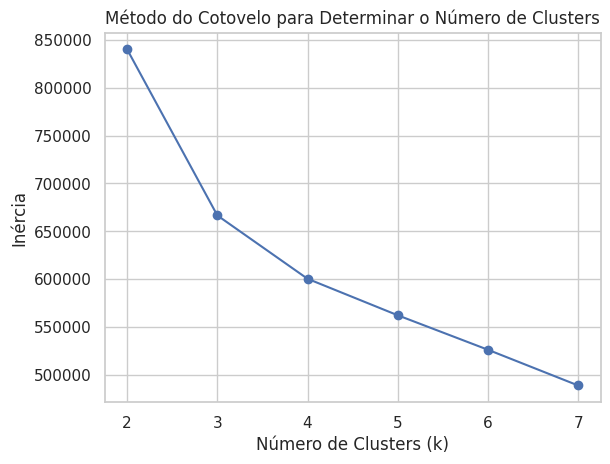

In [38]:
plt.plot(k_clusters, inercia_gower, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('Inércia')
plt.title('Método do Cotovelo para Determinar o Número de Clusters')
plt.show()

### Silhouette Score + Gower

#### Para ajudar a quantificar melhor essa separação, foi calculado o silhouette_scores de 2 a 7 grupos para poder medir a diferença entre eles, esse calculo varia de -1 a 1, onde 1 representa que estão muito bem divididos, o 0 representa que um nucleo está muito semelhante ao outro e -1 que pode ter ocorrido alguma mescla entre os dados que não foi bem classificada a um nucleo especifico.

##### Alerta de tempo elevado de carregamento

In [39]:
silhouette_scores = {}

for k in k_clusters:
    clusters = KMeans(n_clusters = k, random_state=1)
    cluster_labels = clusters.fit_predict(gower_dist)

    silhouette_scores[f'{k}'] = metrics.silhouette_score(gower_dist, cluster_labels)

#### Os melhores agrupamentos ficaram sendo 3, 2 e 4. Será feito um novo agrupamento usando apenas variáveis numéricas para comparação.

In [40]:
# Valores para cada agrupamento
silhouette_scores

{'2': 0.36359274,
 '3': 0.22208229,
 '4': 0.18871488,
 '5': 0.17832093,
 '6': 0.1858439,
 '7': 0.18792301}

### Silhouette Score + Numéricas Continuas

In [41]:
# Copiando o DataFrame alterado e deixando apenas as variáveis numéricas continuas
df_dummy_normalizado_podado_numerico = df_dummy_normalizado_podado[numericas].copy()
df_dummy_normalizado_podado_numerico

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,-0.457191,-0.244931,-0.624348,3.667189,3.229316,-0.317178
1,-0.457191,-0.244931,-0.590903,-0.457683,1.171473,-0.317178
2,-0.457191,-0.244931,-0.624348,3.667189,3.229316,-0.317178
3,-0.457191,-0.244931,-0.622954,0.573535,1.994610,-0.317178
4,-0.457191,-0.244931,-0.296430,-0.045196,0.142551,-0.317178
...,...,...,...,...,...,...
12325,0.363075,-0.244931,0.307822,-0.310366,-0.288966,0.342125
12326,-0.457191,-0.244931,-0.380957,-0.457683,-0.447364,-0.317178
12327,-0.457191,-0.244931,-0.528063,1.261014,0.897093,-0.317178
12328,-0.032916,-0.244931,-0.443536,-0.457683,-0.453140,-0.317178


In [42]:
silhouette_scores = {}

for k in k_clusters:
    clusters = KMeans(n_clusters = k, random_state=1)
    cluster_labels = clusters.fit_predict(df_dummy_normalizado_podado_numerico)

    silhouette_scores[f'{k}'] = metrics.silhouette_score(df_dummy_normalizado_podado_numerico, cluster_labels)

#### No resultado abaixo os melhores foram 3, 2 e 4 grupos, o mesmo resultado anterior, porém o mesmo será feito para as variáveis categóricas separadamente.

#### Resultados das variáveis numéricas continuas

In [43]:
silhouette_scores

{'2': 0.5805157930628505,
 '3': 0.5926595678064613,
 '4': 0.5214593209600789,
 '5': 0.5583143630736982,
 '6': 0.5187144363040902,
 '7': 0.36982142410614016}

### Silhouette Score + Categóricas

In [44]:
# Novo DataFrame que contem todas variáveis menos as numéricas
df_dummy_normalizado_podado_categoricas = df_dummy_normalizado_podado[colunas_nao_numericas].copy()
df_dummy_normalizado_podado_categoricas

,Administrative,Month,ProductRelated,Region,TrafficType
0,0,2,1,1,1
1,0,2,2,1,2
2,0,2,1,9,3
3,0,2,2,2,4
4,0,2,10,1,4
...,...,...,...,...,...
12325,3,12,53,1,1
12326,0,11,5,1,8
12327,0,11,6,1,13
12328,4,11,15,3,11


In [45]:
silhouette_scores = {}

for k in k_clusters:
    clusters = KMeans(n_clusters = k, random_state=1)
    cluster_labels = clusters.fit_predict(df_dummy_normalizado_podado_categoricas)

    silhouette_scores[f'{k}'] = metrics.silhouette_score(df_dummy_normalizado_podado_categoricas, cluster_labels)

#### Foi bem similar aos demais, mas agora invertendo e com os melhores resultados sendo 2, 3 e 4 grupos. Os resultados em geral foram semelhantes, mas todos deram bastante importância as quantidades de 2 e 3 grupos, no máximo 4 grupos.


#### Resultado das variáveis categóricas

In [46]:
silhouette_scores

{'2': 0.762616791778016,
 '3': 0.6731834876084533,
 '4': 0.5665037151981218,
 '5': 0.5045433871683235,
 '6': 0.47449601792582635,
 '7': 0.4587193826948739}

## Agrupamento e Análise dos Grupos

#### Para melhor analisar os resultados, os valores das variáveis numéricas continuas vão estar da forma original.

In [47]:
# Copiando o DataFrame usado nas analises, esse novo não será normalizado
df_dummy_podado = df_dummy_normalizado_podado.copy()

# Invertendo os valores das colunas numéricas continuas para seus valores originais
df_dummy_podado[numericas] = scaler.inverse_transform(df_dummy_podado[numericas])

# Adicionando a coluna Revenue para futuras comparações
df_dummy_podado['Revenue_True'] = df_dummy['Revenue_True']
df_dummy_podado

,PageValues,ExitRates,ProductRelated_Duration,ProductRelated,BounceRates,Administrative_Duration,Month,Administrative,TrafficType,Region,Informational_Duration,Revenue_True
0,8.881784e-16,0.200000,0.000000,1,0.200000,0.0,2,0,1,1,0.0,False
1,8.881784e-16,0.100000,64.000000,2,0.000000,0.0,2,0,2,1,0.0,False
2,8.881784e-16,0.200000,0.000000,1,0.200000,0.0,2,0,3,9,0.0,False
3,8.881784e-16,0.140000,2.666667,2,0.050000,0.0,2,0,4,2,0.0,False
4,8.881784e-16,0.050000,627.500000,10,0.020000,0.0,2,0,4,1,0.0,False
...,...,...,...,...,...,...,...,...,...,...,...,...
12325,1.224172e+01,0.029031,1783.791667,53,0.007143,145.0,12,3,1,1,0.0,False
12326,8.881784e-16,0.021333,465.750000,5,0.000000,0.0,11,0,8,1,0.0,False
12327,8.881784e-16,0.086667,184.250000,6,0.083333,0.0,11,0,13,1,0.0,False
12328,8.881784e-16,0.021053,346.000000,15,0.000000,75.0,11,4,11,3,0.0,False


### Agrupando em 2 grupos

In [48]:
# Criando o modelo para 2 grupos e treinando usando o DataFrame preparado anteriormente
kmeans_2 = KMeans(n_clusters = 2, random_state = 1)
cluster_labels_2 = kmeans_2.fit_predict(df_dummy_normalizado_podado)

# Copiando o DataFrame com os valores antes da normalização
df_clusters_2 = df_dummy_podado.copy()
# Criando nova coluna Cluster com os respectivos grupos
df_clusters_2['Cluster'] = cluster_labels_2

#### Verificando Proporções

In [49]:
# Contagem de individuos para cada grupo
contagem_grupos = df_clusters_2['Cluster'].value_counts()
contagem_grupos

,count
Cluster,
0,11325
1,1005


In [50]:
total_compradores_grupo_0 = df_clusters_2[df_clusters_2['Cluster']==0]['Revenue_True'].sum()
print(f'Total de compradores do grupo 0: {total_compradores_grupo_0}')
print(f'Porcentagem de compradores do grupo 0: {(total_compradores_grupo_0/contagem_grupos[0])*100}%')
print('\n')
total_compradores_grupo_1 = df_clusters_2[df_clusters_2['Cluster']==1]['Revenue_True'].sum()
print(f'Total de compradores do grupo 1: {total_compradores_grupo_1}')
print(f'Porcentagem de compradores do grupo 1: {(total_compradores_grupo_1/contagem_grupos[1])*100}%')

Total de compradores do grupo 0: 1619
Porcentagem de compradores do grupo 0: 14.29580573951435%


Total de compradores do grupo 1: 289
Porcentagem de compradores do grupo 1: 28.756218905472636%


#### Analise das Caracteristicas Numéricas  

#### Para comparar o grupo 0 e 1 vai ser medido suas médias e medianas, verificar seu valor geral e comparalos.

In [51]:
# Analisando as características de cada grupo
means_clusters_2 = df_clusters_2.groupby('Cluster')[numericas].mean()  # Médias de cada variável por cluster
median_clusters_2 = df_clusters_2.groupby('Cluster')[numericas].median()  # Medianas de cada variável por cluster

In [53]:
# Calcula a média geral das colunas numéricas
media_geral = df_clusters_2[numericas].mean()

# Concatena o DataFrame means_clusters_2 com a média geral
means_clusters_2_comparacao = pd.concat([means_clusters_2, pd.DataFrame([media_geral])], ignore_index=True)

# Ajusta o índice para incluir 'Média Geral'
means_clusters_2_comparacao.index = means_clusters_2.index.tolist() + ['Média Geral']

# Exibe o resultado
means_clusters_2_comparacao

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,71.110898,26.038484,831.642417,0.023635,0.045255,5.780915
1,190.211489,129.511283,5286.438323,0.005921,0.018487,7.110142
Média Geral,80.818611,34.472398,1194.746220,0.022191,0.043073,5.889258


In [62]:
# Calcula a mediana geral das colunas numéricas
mediana_geral = df_clusters_2[numericas].median()

# Concatena o DataFrame median_clusters_2 com a mediana geral
median_clusters_2_comparacao = pd.concat([median_clusters_2, pd.DataFrame([mediana_geral])], ignore_index=True)

# Ajusta o índice para incluir 'Mediana Geral'
median_clusters_2_comparacao.index = median_clusters_2.index.tolist() + ['Mediana Geral']

# Exibe o resultado
median_clusters_2_comparacao

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.00,0.0,512.066667,0.002667,0.027207,8.881784e-16
1,105.75,14.0,4251.208187,0.003922,0.016381,3.352324e-01
Mediana Geral,7.50,0.0,598.936905,0.003112,0.025156,8.881784e-16


#### De acordo com as médias, o grupo 1 passa muito mais tempo no site independente do tipo de página, as taxas de Bouce e Exit são muito menores e acessam página com mais valor em geral. As medianas não ficaram com valores tão confiaveis, no geral da pra ver uma similaridade com a média, porém a média foi muito mais eficaz em seus resultdos.
<br>

#### Sendo assim, a separação dos grupos ficou bem simplista em pessoas que tem maior potencial de compra e pessoas que tem menos potêncial de compra, sendo as pessoas que mais compram tem maior gasto de tempo nas páginas e menor evasão do site, o que já era de se esperar, vamos ver como esses comportamentos mudam com uma quantidade maior de grupos.

#### Analise das Caracteristicas Categóricas  

In [63]:
# Guardando em col_categoricas todos valores não listados em numericas
col_categoricas = df_clusters_2.columns.difference(numericas)
# Removendo a coluna Cluster
col_categoricas = col_categoricas.drop('Cluster')
col_categoricas

Index(['Administrative', 'Month', 'ProductRelated', 'Region', 'Revenue_True',
       'TrafficType'],
      dtype='object')

In [64]:
for coluna in col_categoricas:
    # Calculando a contagem de frequência para cada grupo
    contagem_frequencia = df_clusters_2.groupby('Cluster')[coluna].value_counts().unstack(fill_value=0)
    # Normalizando a contagem de frequência pela quantidade de indivíduos em cada grupo
    contagem_frequencia = contagem_frequencia.divide([contagem_grupos[0], contagem_grupos[1]], axis=0)
    # Exibir a contagem de frequência
    print(contagem_frequencia)

Administrative        0         1         2         3         4         5   \
Cluster                                                                      
0               0.549121  0.123535  0.102051  0.082520  0.067285  0.047266   
1               0.076679  0.047065  0.036489  0.037017  0.040190  0.048123   

Administrative        6         7         8         9   ...        17  \
Cluster                                                 ...             
0               0.035742  0.026367  0.022559  0.017188  ...  0.000977   
1               0.034902  0.035960  0.029614  0.025912  ...  0.003173   

Administrative        18        19        20        21        22        23  \
Cluster                                                                      
0               0.000488  0.000195  0.000000  0.000098  0.000098  0.000098   
1               0.003702  0.002115  0.001058  0.000529  0.001586  0.001058   

Administrative        24        26        27  
Cluster                           

#### Ficou muito mais fácil identificar padrões usando as colunas numéricas, mas as categóricas também puderam contribuir:
<br>

#### Deu para perceber que clientes do grupo 1 aumentam suas compras consideravelmente no final de ano, principalmente em novembro.
#### Apesar dos clientes do grupo 1 gastarem mais tempos em páginas administrativas, curiosamente os clientes do grupo 0 acessam bastante as páginas 0, 1 e 2

### Agrupando em 3 grupos

In [65]:
# Criando o modelo para 2 grupos e treinando usando o DataFrame preparado anteriormente
kmeans_3 = KMeans(n_clusters = 3, random_state = 1)
cluster_labels_3 = kmeans_3.fit_predict(df_dummy_normalizado_podado)

# Copiando o DataFrame com os valores antes da normalização
df_clusters_3 = df_dummy_podado.copy()
# Criando nova coluna Cluster com os respectivos grupos
df_clusters_3['Cluster'] = cluster_labels_3

#### Verificando Proporções

In [66]:
# Contagem de individuos para cada grupo
contagem_grupos = df_clusters_3['Cluster'].value_counts()
contagem_grupos

,count
Cluster,
0,10240
1,1891
2,199


In [67]:
total_compradores_grupo_0 = df_clusters_3[df_clusters_3['Cluster']==0]['Revenue_True'].sum()
print(f'Total de compradores do grupo 0: {total_compradores_grupo_0}')
print(f'Porcentagem de compradores do grupo 0: {(total_compradores_grupo_0/contagem_grupos[0])*100}%')
print('\n')
total_compradores_grupo_1 = df_clusters_3[df_clusters_3['Cluster']==1]['Revenue_True'].sum()
print(f'Total de compradores do grupo 1: {total_compradores_grupo_1}')
print(f'Porcentagem de compradores do grupo 1: {(total_compradores_grupo_1/contagem_grupos[1])*100}%')
print('\n')
total_compradores_grupo_2 = df_clusters_3[df_clusters_3['Cluster']==2]['Revenue_True'].sum()
print(f'Total de compradores do grupo 2: {total_compradores_grupo_2}')
print(f'Porcentagem de compradores do grupo 2: {(total_compradores_grupo_2/contagem_grupos[2])*100}%')

Total de compradores do grupo 0: 1375
Porcentagem de compradores do grupo 0: 13.427734375%


Total de compradores do grupo 1: 465
Porcentagem de compradores do grupo 1: 24.59016393442623%


Total de compradores do grupo 2: 68
Porcentagem de compradores do grupo 2: 34.17085427135678%


#### Analise das Caracteristicas Numéricas

#### Para comparar o grupo 0, 1 e 2 vai ser medido suas médias e medianas, verificar seu valor geral e comparalos.

In [68]:
# Analisando as características de cada grupo
means_clusters_3 = df_clusters_3.groupby('Cluster')[numericas].mean()  # Médias de cada variável por cluster
median_clusters_3 = df_clusters_3.groupby('Cluster')[numericas].median()  # Medianas de cada variável por cluster

In [69]:
# Calcula a média geral das colunas numéricas
media_geral = df_clusters_3[numericas].mean()

# Concatena o DataFrame means_clusters_3 com a média geral
means_clusters_3_comparacao = pd.concat([means_clusters_3, pd.DataFrame([media_geral])], ignore_index=True)

# Ajusta o índice para incluir 'Média Geral'
means_clusters_3_comparacao.index = means_clusters_3.index.tolist() + ['Média Geral']

# Exibe o resultado
means_clusters_3_comparacao

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,63.692487,21.418558,663.366572,0.025415,0.047912,5.481222
1,151.418914,86.105862,3153.814197,0.006521,0.019571,8.093904
2,291.202203,215.539927,9922.032884,0.005236,0.017393,5.936001
Média Geral,80.818611,34.472398,1194.746220,0.022191,0.043073,5.889258


In [71]:
# Calcula a mediana geral das colunas numéricas
mediana_geral = df_clusters_3[numericas].median()

# Concatena o DataFrame median_clusters_3 com a mediana geral
median_clusters_3_comparacao = pd.concat([median_clusters_3, pd.DataFrame([mediana_geral])], ignore_index=True)

# Ajusta o índice para incluir 'Mediana Geral'
median_clusters_3_comparacao.index = median_clusters_3.index.tolist() + ['Mediana Geral']

# Exibe o resultado
median_clusters_3_comparacao

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,0.000000,0.0,430.803571,0.000000,0.028571,8.881784e-16
1,80.066667,0.0,2716.666667,0.004098,0.017562,8.881784e-16
2,172.375000,52.4,8768.477228,0.003459,0.015722,8.884860e-01
Mediana Geral,7.500000,0.0,598.936905,0.003112,0.025156,8.881784e-16


#### Analise das Caracteristicas Categóricas

In [72]:
for coluna in col_categoricas:
    # Calculando a contagem de frequência para cada grupo
    contagem_frequencia = df_clusters_3.groupby('Cluster')[coluna].value_counts().unstack(fill_value=0)
    # Normalizando a contagem de frequência pela quantidade de indivíduos em cada grupo
    contagem_frequencia = contagem_frequencia.divide([contagem_grupos[0], contagem_grupos[1], contagem_grupos[2]], axis=0)
    # Exibir a contagem de frequência
    print(contagem_frequencia)

Administrative        0         1         2         3         4         5   \
Cluster                                                                      
0               0.524805  0.110547  0.092676  0.073242  0.058301  0.040332   
1               0.201481  0.111581  0.083554  0.081438  0.079852  0.072977   
2               0.065327  0.055276  0.035176  0.055276  0.085427  0.120603   

Administrative        6         7         8         9   ...        17  \
Cluster                                                 ...             
0               0.029785  0.020508  0.017188  0.012207  ...  0.000391   
1               0.062930  0.059757  0.052882  0.050238  ...  0.004759   
2               0.040201  0.075377  0.055276  0.025126  ...  0.015075   

Administrative        18        19       20        21        22        23  \
Cluster                                                                     
0               0.000195  0.000098  0.00000  0.000000  0.000000  0.000000   
1           

#### De maneira geral teve muita semelhança com a divisão em 2 grupos, porém o grupo 3 é um grupo extremamente seleto, são pessoas que tem uma chancec muito alta de compra e todas caracteristicas que eram do grupo 2 o grupo 3 também tem, porém de forma exponencial.

### Agrupando em 4 grupos

In [73]:
# Criando o modelo para 2 grupos e treinando usando o DataFrame preparado anteriormente
kmeans_4 = KMeans(n_clusters = 4, random_state = 1)
cluster_labels_4 = kmeans_4.fit_predict(df_dummy_normalizado_podado)

# Copiando o DataFrame com os valores antes da normalização
df_clusters_4 = df_dummy_podado.copy()
# Criando nova coluna Cluster com os respectivos grupos
df_clusters_4['Cluster'] = cluster_labels_4


#### Verificando Proporções

In [74]:
# Contagem de individuos para cada grupo
contagem_grupos = df_clusters_4['Cluster'].value_counts()
contagem_grupos

,count
Cluster,
3,8552
0,2863
1,782
2,133


In [75]:
total_compradores_grupo_0 = df_clusters_4[df_clusters_4['Cluster']==0]['Revenue_True'].sum()
print(f'Total de compradores do grupo 0: {total_compradores_grupo_0}')
print(f'Porcentagem de compradores do grupo 0: {(total_compradores_grupo_0/contagem_grupos[0])*100}%')
print('\n')
total_compradores_grupo_1 = df_clusters_4[df_clusters_4['Cluster']==1]['Revenue_True'].sum()
print(f'Total de compradores do grupo 1: {total_compradores_grupo_1}')
print(f'Porcentagem de compradores do grupo 1: {(total_compradores_grupo_1/contagem_grupos[1])*100}%')
print('\n')
total_compradores_grupo_2 = df_clusters_4[df_clusters_4['Cluster']==2]['Revenue_True'].sum()
print(f'Total de compradores do grupo 2: {total_compradores_grupo_2}')
print(f'Porcentagem de compradores do grupo 2: {(total_compradores_grupo_2/contagem_grupos[2])*100}%')
print('\n')
total_compradores_grupo_3 = df_clusters_4[df_clusters_4['Cluster']==3]['Revenue_True'].sum()
print(f'Total de compradores do grupo 3: {total_compradores_grupo_3}')
print(f'Porcentagem de compradores do grupo 2: {(total_compradores_grupo_3/contagem_grupos[3])*100}%')

Total de compradores do grupo 0: 599
Porcentagem de compradores do grupo 0: 20.92210967516591%


Total de compradores do grupo 1: 221
Porcentagem de compradores do grupo 1: 28.26086956521739%


Total de compradores do grupo 2: 50
Porcentagem de compradores do grupo 2: 37.59398496240601%


Total de compradores do grupo 3: 1038
Porcentagem de compradores do grupo 2: 12.137511693171188%


#### Analise das Caracteristicas Numéricas

#### Para comparar o grupo 0, 1, 2 e 3 vai ser medido suas médias e medianas, verificar seu valor geral e comparalos.

In [76]:
# Analisando as características de cada grupo
means_clusters_4 = df_clusters_4.groupby('Cluster')[numericas].mean()  # Médias de cada variável por cluster
median_clusters_4 = df_clusters_4.groupby('Cluster')[numericas].median()  # Medianas de cada variável por cluster

In [79]:
# Calcula a média geral das colunas numéricas
media_geral = df_clusters_4[numericas].mean()

# Concatena o DataFrame means_clusters_4 com a média geral
means_clusters_4_comparacao = pd.concat([means_clusters_4, pd.DataFrame([media_geral])], ignore_index=True)

# Ajusta o índice para incluir 'Média Geral'
means_clusters_4_comparacao.index = means_clusters_4.index.tolist() + ['Média Geral']

# Exibe o resultado
means_clusters_4_comparacao

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,123.590244,54.540717,1902.158890,0.007475,0.021678,8.561543
1,175.448917,114.640881,4519.212668,0.005990,0.018566,7.829431
2,311.698024,252.746491,11374.036043,0.005375,0.017073,4.267705
3,54.256046,17.028782,495.623116,0.028861,0.052881,4.842450
Média Geral,80.818611,34.472398,1194.746220,0.022191,0.043073,5.889258


In [81]:
# Calcula a mediana geral das colunas numéricas
mediana_geral = df_clusters_4[numericas].median()

# Concatena o DataFrame median_clusters_4 com a mediana geral
median_clusters_4_comparacao = pd.concat([median_clusters_4, pd.DataFrame([mediana_geral])], ignore_index=True)

# Ajusta o índice para incluir 'Mediana Geral'
median_clusters_4_comparacao.index = median_clusters_4.index.tolist() + ['Mediana Geral']

# Exibe o resultado
median_clusters_4_comparacao

,Administrative_Duration,Informational_Duration,ProductRelated_Duration,BounceRates,ExitRates,PageValues
0,56.800000,0.00,1609.313889,0.004494,0.018892,8.881784e-16
1,101.633929,11.00,4089.787708,0.003911,0.016448,2.867025e-01
2,166.916667,68.75,9770.812093,0.003655,0.015735,8.884860e-01
3,0.000000,0.00,314.271667,0.000000,0.033333,8.881784e-16
Mediana Geral,7.500000,0.00,598.936905,0.003112,0.025156,8.881784e-16


#### Analise das Caracteristicas Categóricas

In [82]:
for coluna in col_categoricas:
    # Calculando a contagem de frequência para cada grupo
    contagem_frequencia = df_clusters_4.groupby('Cluster')[coluna].value_counts().unstack(fill_value=0)
    # Normalizando a contagem de frequência pela quantidade de indivíduos em cada grupo
    contagem_frequencia = contagem_frequencia.divide([contagem_grupos[0], contagem_grupos[1], contagem_grupos[2], contagem_grupos[3]], axis=0)
    # Exibir a contagem de frequência
    print(contagem_frequencia)

Administrative        0         1         2         3         4         5   \
Cluster                                                                      
0               0.272092  0.123297  0.100594  0.084177  0.077192  0.070206   
1               0.154731  0.097187  0.067775  0.069054  0.075448  0.079284   
2               0.060150  0.060150  0.045113  0.052632  0.090226  0.135338   
3               0.568288  0.107226  0.089687  0.071679  0.055309  0.034378   

Administrative        6         7         8         9   ...        17  \
Cluster                                                 ...             
0               0.058680  0.047852  0.042613  0.038072  ...  0.003493   
1               0.070332  0.065217  0.056266  0.053708  ...  0.005115   
2               0.030075  0.090226  0.052632  0.030075  ...  0.015038   
3               0.023971  0.016137  0.013330  0.008185  ...  0.000000   

Administrative        18        19        20        21        22        23  \
Cluster       

#### Para quantidade de 4 grupos mudou bastante os valores, os clientes sem muito retorno continuam no grupo 0, gastam pouco tempo em todos tipos de página em geral e tem uma taxa de evasão do site maior que a média, os grupos 1, 2 e 3 são clientes que tem um maior potêncial de compra, sendo que quanto mais gastam tempo em páginas e menor sua evasão das páginas, maior a possibilidade de compra. Curioso foi que o valor médio de PageValue do grupo 3 ficou abaixo da média, talvez por ser uma quantidade baixa de individuos e ter pego algumas páginas que tem um valor muito baixo.

# Conclusões

#### O tipo das features impacta significantemente o desempenho dos algorítimos de clusterização, assim como a grandeza dos valores numéricos, sendo necessária a correta preparação dos dados e sua devida utilização para não tirar conclusões errôneas.  Durante o projeto não inclui resultados com uso de todas as features, mas a etapa de seleção de features foi essencial para um melhor resultado e talvez fosse interessante filtrar um pouco mais para comparar os resultados.
<br>

#### Quanto aos agrupamentos, os grupos foram divididos primordialmente em clientes que gastam mais tempo nas páginas e acabam comprando, para clientes que não passam muito tempo nas páginas e tem uma evasão maior do site, então cabe entender quais as diferenças entre o agrupamento de 3 e 4 grupos; Esses grupos continuaram com características do agrupamento em 2 grupos, mas dividindo os grupos em intensidades. Além disso, os meses mostram uma maior intensidade de compras, principalmente dos grupos que mostram que tem maior chance de compras.
<br>

#### Sendo assim, referente ao agrupamento com 4 grupos, os clientes do grupo 3 são os de maior chance de compra, são os que apresentam melhor índice de tempo de página e evasão, porém eles apresentam uma quantidade muito baixa, representando apenas 91 indivíduos, o que mostra que é extremamente importante trabalhar em pró dos demais clientes, no cliente do tipo 0 para tentar compreender suas necessidades, o cliente do tipo 1 para mantê-los por perto e clientes do tipo 2 que contam com 2649 indivíduos e uma boa taxa de 20% de compra que tem o maior potencial de melhora.